# Analyzing methods to collect data

In [ ]:
import pandas as pd

In [ ]:
import requests
import pandas as pd
def fetch_openf1_data(endpoint, params=None):
 base_url = "https://api.openf1.org/v1/"
 url = f"{base_url}{endpoint}"
 response = requests.get(url, params=params)
 response.raise_for_status() # Raise an exception for HTTP errors
 return response.json()

In [ ]:
hypothetical_session_key = 'latest'

The cell below was used for testing openF1. Ultimately it was decided to use FastF1 because of it's easier integration with Python

In [ ]:
# try:
#  lap_data = fetch_openf1_data('laps', {'session_key': hypothetical_session_key})
#  laps_df = pd.DataFrame(lap_data)
#  print(f"Fetched {len(laps_df)} laps.")
#  print(laps_df.head())
# except requests.exceptions.RequestException as e:
#  print(f"Error fetching data: {e}")
#  laps_df = pd.DataFrame()



# Using FastF1 to collect data and create a dataframe

In [ ]:
import fastf1
import fastf1.plotting
import pandas as pd
import os


cache_dir = os.path.expanduser("~/.fastf1_cache")
os.makedirs(cache_dir, exist_ok=True)

fastf1.Cache.enable_cache("~/.fastf1_cache")
 # Example: Load a specific race session (e.g., 2023 Austrian Grand Prix Race)
 # You can find the correct year, GP name, and session type from the FastF1 documentation or by exploring.
 # For the Austrian Grand Prix, the GP name is typically 'Austrian Grand Prix'
try:
     session = fastf1.get_session(2023, 'Austrian Grand Prix', 'Race')
     session.load()
     fastf1_laps = session.laps
     print(f"\nFetched {len(fastf1_laps)} laps using FastF1 API.")
     print(fastf1_laps.head())

     # Access driver data
     fastf1_drivers = session.drivers
     print("\nFastF1 Driver Data:")
     print(fastf1_drivers.head())

     # Access telemetry data for a specific driver and lap (example)
     # Pick a driver (e.g., Max Verstappen, driver number 33)
     driver_telemetry = fastf1_laps.pick_driver(33).telemetry
     print("\nFastF1 Telemetry Data (Driver 33, all laps):")
     print(driver_telemetry.head())

     # Access weather data
     fastf1_weather = session.weather_data
     print("\nFastF1 Weather Data:")
     print(fastf1_weather.head())

except Exception as e:
    print(f"Error fetching data from FastF1: {e}")
    fastf1_laps = pd.DataFrame()
    fastf1_drivers = pd.DataFrame()
    fastf1_telemetry = pd.DataFrame()
    fastf1_weather = pd.DataFrame()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c


Fetched 1354 laps using FastF1 API.
                    Time Driver DriverNumber                LapTime  \
0 0 days 01:03:05.095000    VER            1 0 days 00:01:17.639000   
1 0 days 01:05:00.574000    VER            1 0 days 00:01:55.479000   
2 0 days 01:07:05.295000    VER            1 0 days 00:02:04.721000   
3 0 days 01:08:14.986000    VER            1 0 days 00:01:09.691000   
4 0 days 01:09:25.012000    VER            1 0 days 00:01:10.026000   

   LapNumber  Stint             PitOutTime              PitInTime  \
0        1.0    1.0                    NaT                    NaT   
1        2.0    1.0                    NaT 0 days 01:04:57.200000   
2        3.0    2.0 0 days 01:05:13.560000                    NaT   
3        4.0    2.0                    NaT                    NaT   
4        5.0    2.0                    NaT                    NaT   

             Sector1Time            Sector2Time  ... FreshTyre  \
0                    NaT 0 days 00:00:31.613000  ...   

In [ ]:
years = list(range(2018, 2024 + 1))  # adjust range as needed
all_laps = []

for year in years:
    try:
        session = fastf1.get_session(year, 'Austrian Grand Prix', 'Race')
        session.load()
        laps = session.laps
        laps["year"] = year
        all_laps.append(laps)
    except Exception as e:
        print(f"Failed to load {year}: {e}")

df_all_laps = pd.concat(all_laps, ignore_index=True)


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [ ]:
df_all_laps.to_csv('f1data.csv', index=False)

# Predicting the Austrian Grand Prix

Run the code from here:


In [1]:
import pandas as pd
df = pd.read_csv('f1data.csv')

In [2]:
df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,year
0,0 days 00:08:03.720000,GAS,10,0 days 00:01:20.158000,1.0,NaN,NaN,NaN,NaN,0 days 00:00:34.389000,...,Toro Rosso,0 days 00:06:43.395000,2018-07-01 13:12:43.611,NaN,15.0,False,NaN,False,False,2018
1,0 days 00:09:16.779000,GAS,10,0 days 00:01:13.059000,2.0,1.0,NaN,NaN,0 days 00:00:17.521000,0 days 00:00:33.053000,...,Toro Rosso,0 days 00:08:03.720000,2018-07-01 13:14:03.936,21.0,14.0,False,NaN,False,True,2018
2,0 days 00:10:28.223000,GAS,10,0 days 00:01:11.444000,3.0,1.0,NaN,NaN,0 days 00:00:17.443000,0 days 00:00:31.545000,...,Toro Rosso,0 days 00:09:16.779000,2018-07-01 13:15:16.995,1.0,14.0,False,NaN,False,True,2018
3,0 days 00:11:39.388000,GAS,10,0 days 00:01:11.165000,4.0,1.0,NaN,NaN,0 days 00:00:17.161000,0 days 00:00:31.737000,...,Toro Rosso,0 days 00:10:28.223000,2018-07-01 13:16:28.439,1.0,14.0,False,NaN,False,True,2018
4,0 days 00:12:51.796000,GAS,10,0 days 00:01:12.408000,5.0,1.0,NaN,NaN,0 days 00:00:17.333000,0 days 00:00:31.559000,...,Toro Rosso,0 days 00:11:39.388000,2018-07-01 13:17:39.604,1.0,15.0,False,NaN,False,True,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,0 days 02:06:32.304000,NOR,4,0 days 00:01:09.356000,60.0,3.0,NaN,NaN,0 days 00:00:17.270000,0 days 00:00:31.434000,...,McLaren,0 days 02:05:22.948000,2024-06-30 14:12:54.059,1.0,2.0,False,NaN,False,True,2024
9114,0 days 02:07:42.341000,NOR,4,0 days 00:01:10.037000,61.0,3.0,NaN,NaN,0 days 00:00:17.086000,0 days 00:00:32.125000,...,McLaren,0 days 02:06:32.304000,2024-06-30 14:14:03.415,1.0,2.0,False,NaN,False,True,2024
9115,0 days 02:08:51.850000,NOR,4,0 days 00:01:09.509000,62.0,3.0,NaN,NaN,0 days 00:00:17.182000,0 days 00:00:31.527000,...,McLaren,0 days 02:07:42.341000,2024-06-30 14:15:13.452,1.0,2.0,False,NaN,False,True,2024
9116,0 days 02:10:02.084000,NOR,4,0 days 00:01:10.234000,63.0,3.0,NaN,NaN,0 days 00:00:17.195000,0 days 00:00:32.111000,...,McLaren,0 days 02:08:51.850000,2024-06-30 14:16:22.961,1.0,2.0,False,NaN,False,True,2024


In [3]:
df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'year'],
      dtype='object')

In [4]:
# prompt: drop columns in the dataframe

df = df.drop(['Time', 'Driver','DeletedReason','FastF1Generated','IsAccurate'], axis=1)
df

,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,year
0,10,0 days 00:01:20.158000,1.0,NaN,NaN,NaN,NaN,0 days 00:00:34.389000,0 days 00:00:23.283000,NaN,...,NaN,NaN,True,Toro Rosso,0 days 00:06:43.395000,2018-07-01 13:12:43.611,NaN,15.0,False,2018
1,10,0 days 00:01:13.059000,2.0,1.0,NaN,NaN,0 days 00:00:17.521000,0 days 00:00:33.053000,0 days 00:00:22.485000,0 days 00:08:21.241000,...,SUPERSOFT,1.0,True,Toro Rosso,0 days 00:08:03.720000,2018-07-01 13:14:03.936,21.0,14.0,False,2018
2,10,0 days 00:01:11.444000,3.0,1.0,NaN,NaN,0 days 00:00:17.443000,0 days 00:00:31.545000,0 days 00:00:22.456000,0 days 00:09:34.222000,...,SUPERSOFT,2.0,True,Toro Rosso,0 days 00:09:16.779000,2018-07-01 13:15:16.995,1.0,14.0,False,2018
3,10,0 days 00:01:11.165000,4.0,1.0,NaN,NaN,0 days 00:00:17.161000,0 days 00:00:31.737000,0 days 00:00:22.267000,0 days 00:10:45.384000,...,SUPERSOFT,3.0,True,Toro Rosso,0 days 00:10:28.223000,2018-07-01 13:16:28.439,1.0,14.0,False,2018
4,10,0 days 00:01:12.408000,5.0,1.0,NaN,NaN,0 days 00:00:17.333000,0 days 00:00:31.559000,0 days 00:00:23.516000,0 days 00:11:56.721000,...,SUPERSOFT,4.0,True,Toro Rosso,0 days 00:11:39.388000,2018-07-01 13:17:39.604,1.0,15.0,False,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,4,0 days 00:01:09.356000,60.0,3.0,NaN,NaN,0 days 00:00:17.270000,0 days 00:00:31.434000,0 days 00:00:20.652000,0 days 02:05:40.272000,...,MEDIUM,9.0,True,McLaren,0 days 02:05:22.948000,2024-06-30 14:12:54.059,1.0,2.0,False,2024
9114,4,0 days 00:01:10.037000,61.0,3.0,NaN,NaN,0 days 00:00:17.086000,0 days 00:00:32.125000,0 days 00:00:20.826000,0 days 02:06:49.444000,...,MEDIUM,10.0,True,McLaren,0 days 02:06:32.304000,2024-06-30 14:14:03.415,1.0,2.0,False,2024
9115,4,0 days 00:01:09.509000,62.0,3.0,NaN,NaN,0 days 00:00:17.182000,0 days 00:00:31.527000,0 days 00:00:20.800000,0 days 02:07:59.577000,...,MEDIUM,11.0,True,McLaren,0 days 02:07:42.341000,2024-06-30 14:15:13.452,1.0,2.0,False,2024
9116,4,0 days 00:01:10.234000,63.0,3.0,NaN,NaN,0 days 00:00:17.195000,0 days 00:00:32.111000,0 days 00:00:20.928000,0 days 02:09:09.099000,...,MEDIUM,12.0,True,McLaren,0 days 02:08:51.850000,2024-06-30 14:16:22.961,1.0,2.0,False,2024


In [5]:
# prompt: Replace NaN in stint, PitOutTime, PitInTime, Sector1Time, Sector1SessionTime, Sector2SessionTime, Sector3Time with 0

cols_to_fill = ['Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3Time']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

df.head()

,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,year
0,10,0 days 00:01:20.158000,1.0,0.0,0,0,0,0 days 00:00:34.389000,0 days 00:00:23.283000,0,...,NaN,NaN,True,Toro Rosso,0 days 00:06:43.395000,2018-07-01 13:12:43.611,NaN,15.0,False,2018
1,10,0 days 00:01:13.059000,2.0,1.0,0,0,0 days 00:00:17.521000,0 days 00:00:33.053000,0 days 00:00:22.485000,0 days 00:08:21.241000,...,SUPERSOFT,1.0,True,Toro Rosso,0 days 00:08:03.720000,2018-07-01 13:14:03.936,21.0,14.0,False,2018
2,10,0 days 00:01:11.444000,3.0,1.0,0,0,0 days 00:00:17.443000,0 days 00:00:31.545000,0 days 00:00:22.456000,0 days 00:09:34.222000,...,SUPERSOFT,2.0,True,Toro Rosso,0 days 00:09:16.779000,2018-07-01 13:15:16.995,1.0,14.0,False,2018
3,10,0 days 00:01:11.165000,4.0,1.0,0,0,0 days 00:00:17.161000,0 days 00:00:31.737000,0 days 00:00:22.267000,0 days 00:10:45.384000,...,SUPERSOFT,3.0,True,Toro Rosso,0 days 00:10:28.223000,2018-07-01 13:16:28.439,1.0,14.0,False,2018
4,10,0 days 00:01:12.408000,5.0,1.0,0,0,0 days 00:00:17.333000,0 days 00:00:31.559000,0 days 00:00:23.516000,0 days 00:11:56.721000,...,SUPERSOFT,4.0,True,Toro Rosso,0 days 00:11:39.388000,2018-07-01 13:17:39.604,1.0,15.0,False,2018


In [6]:
# prompt: Show the following columns Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
#        'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',

relevant_columns = ['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                      'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest']

df[relevant_columns]


,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest
0,0,0 days 00:07:40.460000,0 days 00:08:03.822000,304.0,215.0,272.0,297.0,False
1,0 days 00:08:21.241000,0 days 00:08:54.294000,0 days 00:09:16.779000,306.0,214.0,271.0,290.0,True
2,0 days 00:09:34.222000,0 days 00:10:05.767000,0 days 00:10:28.223000,314.0,224.0,278.0,308.0,True
3,0 days 00:10:45.384000,0 days 00:11:17.121000,0 days 00:11:39.388000,316.0,227.0,279.0,309.0,True
4,0 days 00:11:56.721000,0 days 00:12:28.280000,0 days 00:12:51.796000,310.0,228.0,256.0,303.0,False
...,...,...,...,...,...,...,...,...
9113,0 days 02:05:40.272000,0 days 02:06:11.706000,0 days 02:06:32.358000,309.0,231.0,285.0,316.0,False
9114,0 days 02:06:49.444000,0 days 02:07:21.569000,0 days 02:07:42.395000,321.0,234.0,283.0,312.0,False
9115,0 days 02:07:59.577000,0 days 02:08:31.104000,0 days 02:08:51.904000,310.0,234.0,282.0,316.0,False
9116,0 days 02:09:09.099000,0 days 02:09:41.210000,0 days 02:10:02.138000,313.0,232.0,283.0,316.0,False


In [7]:
# prompt: Replace True with 1 and False with 0 in IsPersonalBest.

df['IsPersonalBest'] = df['IsPersonalBest'].replace({True: 1, False: 0})
df['IsPersonalBest']

/tmp/ipython-input-7-1340517496.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsPersonalBest'] = df['IsPersonalBest'].replace({True: 1, False: 0})


,IsPersonalBest
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
9113,0.0
9114,0.0
9115,0.0
9116,0.0


In [8]:
df[relevant_columns]

,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest
0,0,0 days 00:07:40.460000,0 days 00:08:03.822000,304.0,215.0,272.0,297.0,0.0
1,0 days 00:08:21.241000,0 days 00:08:54.294000,0 days 00:09:16.779000,306.0,214.0,271.0,290.0,1.0
2,0 days 00:09:34.222000,0 days 00:10:05.767000,0 days 00:10:28.223000,314.0,224.0,278.0,308.0,1.0
3,0 days 00:10:45.384000,0 days 00:11:17.121000,0 days 00:11:39.388000,316.0,227.0,279.0,309.0,1.0
4,0 days 00:11:56.721000,0 days 00:12:28.280000,0 days 00:12:51.796000,310.0,228.0,256.0,303.0,0.0
...,...,...,...,...,...,...,...,...
9113,0 days 02:05:40.272000,0 days 02:06:11.706000,0 days 02:06:32.358000,309.0,231.0,285.0,316.0,0.0
9114,0 days 02:06:49.444000,0 days 02:07:21.569000,0 days 02:07:42.395000,321.0,234.0,283.0,312.0,0.0
9115,0 days 02:07:59.577000,0 days 02:08:31.104000,0 days 02:08:51.904000,310.0,234.0,282.0,316.0,0.0
9116,0 days 02:09:09.099000,0 days 02:09:41.210000,0 days 02:10:02.138000,313.0,232.0,283.0,316.0,0.0


In [9]:
# prompt: Replace NaN in stint, PitOutTime, PitInTime, Sector1Time, Sector1SessionTime, Sector2SessionTime, Sector3Time with 0

cols_to_fill = ['SpeedI1','SpeedI2','SpeedFL','SpeedST']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

df.head()

,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,year
0,10,0 days 00:01:20.158000,1.0,0.0,0,0,0,0 days 00:00:34.389000,0 days 00:00:23.283000,0,...,NaN,NaN,True,Toro Rosso,0 days 00:06:43.395000,2018-07-01 13:12:43.611,NaN,15.0,False,2018
1,10,0 days 00:01:13.059000,2.0,1.0,0,0,0 days 00:00:17.521000,0 days 00:00:33.053000,0 days 00:00:22.485000,0 days 00:08:21.241000,...,SUPERSOFT,1.0,True,Toro Rosso,0 days 00:08:03.720000,2018-07-01 13:14:03.936,21.0,14.0,False,2018
2,10,0 days 00:01:11.444000,3.0,1.0,0,0,0 days 00:00:17.443000,0 days 00:00:31.545000,0 days 00:00:22.456000,0 days 00:09:34.222000,...,SUPERSOFT,2.0,True,Toro Rosso,0 days 00:09:16.779000,2018-07-01 13:15:16.995,1.0,14.0,False,2018
3,10,0 days 00:01:11.165000,4.0,1.0,0,0,0 days 00:00:17.161000,0 days 00:00:31.737000,0 days 00:00:22.267000,0 days 00:10:45.384000,...,SUPERSOFT,3.0,True,Toro Rosso,0 days 00:10:28.223000,2018-07-01 13:16:28.439,1.0,14.0,False,2018
4,10,0 days 00:01:12.408000,5.0,1.0,0,0,0 days 00:00:17.333000,0 days 00:00:31.559000,0 days 00:00:23.516000,0 days 00:11:56.721000,...,SUPERSOFT,4.0,True,Toro Rosso,0 days 00:11:39.388000,2018-07-01 13:17:39.604,1.0,15.0,False,2018


In [10]:
# prompt: Show the number of NaN left in the dataframe

print(df.isna().sum())

DriverNumber           0
LapTime               19
LapNumber              0
Stint                  0
PitOutTime             0
PitInTime              0
Sector1Time            0
Sector2Time           25
Sector3Time            0
Sector1SessionTime     0
Sector2SessionTime     0
Sector3SessionTime    32
SpeedI1                0
SpeedI2                0
SpeedFL                0
SpeedST                0
IsPersonalBest        14
Compound              21
TyreLife              21
FreshTyre              0
Team                   0
LapStartTime           0
LapStartDate          14
TrackStatus           20
Position              15
Deleted                0
year                   0
dtype: int64


In [11]:
# prompt: Display the rows where LapNumber is NaN

# Display rows where 'LapNumber' is NaN
nan_lap_number_rows = df[df['LapTime'].isna()]
print("\nRows where 'LapTime' is NaN:")
nan_lap_number_rows


Rows where 'LapTime' is NaN:


,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,year
495,27,NaN,12.0,1.0,0,0,0,NaN,0,0,...,ULTRASOFT,14.0,False,Renault,0 days 00:19:53.496000,NaN,12.0,NaN,False,2018
550,28,NaN,55.0,1.0,0,0,0,NaN,0,0,...,SUPERSOFT,54.0,True,Toro Rosso,0 days 01:11:16.907000,NaN,1.0,NaN,False,2018
604,3,NaN,54.0,3.0,0,0,0,NaN,0,0,...,SUPERSOFT,21.0,False,Red Bull Racing,0 days 01:08:47.826000,NaN,12.0,NaN,False,2018
877,44,NaN,63.0,3.0,0,0,0,NaN,0,0,...,SUPERSOFT,11.0,True,Mercedes,0 days 01:18:59.214000,NaN,12.0,NaN,False,2018
1103,77,NaN,14.0,1.0,0,0,0,NaN,0,0,...,SUPERSOFT,16.0,False,Mercedes,0 days 00:21:50.780000,NaN,12.0,NaN,False,2018
2877,20,NaN,20.0,1.0,0,0,0,NaN,0,0,...,MEDIUM,20.0,True,Haas F1 Team,0 days 01:01:29.470000,NaN,12.0,NaN,False,2020
2940,23,NaN,63.0,4.0,0,0,0,NaN,0,0,...,SOFT,20.0,False,Red Bull Racing,0 days 01:59:30.113000,NaN,12.0,NaN,False,2020
3005,26,NaN,65.0,4.0,0,0,0,NaN,0,0,...,SOFT,19.0,False,AlphaTauri,0 days 02:01:52.041000,NaN,1.0,NaN,False,2020
3424,6,NaN,67.0,4.0,0,0,0,NaN,0,0,...,SOFT,18.0,False,Williams,0 days 01:58:13.074000,NaN,12.0,NaN,False,2020
3433,63,NaN,9.0,1.0,0,0,0 days 00:00:17.924000,0 days 00:00:31.836000,0 days 00:00:21.905000,0 days 00:50:03.607000,...,MEDIUM,9.0,True,Williams,0 days 00:42:34.246000,2020-07-05 13:22:34.469,1.0,20.0,False,2020


In [12]:
# prompt: Delete the rows with LapTime = NaN

df.dropna(subset=['LapTime'], inplace=True)
print("\nDataFrame after removing rows with NaN 'LapTime':")
df.head()
print("\nNaN counts after dropping 'LapTime' NaN rows:")
print(df.isna().sum())


DataFrame after removing rows with NaN 'LapTime':

NaN counts after dropping 'LapTime' NaN rows:
DriverNumber           0
LapTime                0
LapNumber              0
Stint                  0
PitOutTime             0
PitInTime              0
Sector1Time            0
Sector2Time            9
Sector3Time            0
Sector1SessionTime     0
Sector2SessionTime     0
Sector3SessionTime    16
SpeedI1                0
SpeedI2                0
SpeedFL                0
SpeedST                0
IsPersonalBest         0
Compound              21
TyreLife              21
FreshTyre              0
Team                   0
LapStartTime           0
LapStartDate           0
TrackStatus           20
Position               0
Deleted                0
year                   0
dtype: int64


In [13]:
relevant_columns = ['Sector2Time','Sector3SessionTime','Compound','TyreLife','TrackStatus']

df[relevant_columns]

,Sector2Time,Sector3SessionTime,Compound,TyreLife,TrackStatus
0,0 days 00:00:34.389000,0 days 00:08:03.822000,NaN,NaN,NaN
1,0 days 00:00:33.053000,0 days 00:09:16.779000,SUPERSOFT,1.0,21.0
2,0 days 00:00:31.545000,0 days 00:10:28.223000,SUPERSOFT,2.0,1.0
3,0 days 00:00:31.737000,0 days 00:11:39.388000,SUPERSOFT,3.0,1.0
4,0 days 00:00:31.559000,0 days 00:12:51.796000,SUPERSOFT,4.0,1.0
...,...,...,...,...,...
9113,0 days 00:00:31.434000,0 days 02:06:32.358000,MEDIUM,9.0,1.0
9114,0 days 00:00:32.125000,0 days 02:07:42.395000,MEDIUM,10.0,1.0
9115,0 days 00:00:31.527000,0 days 02:08:51.904000,MEDIUM,11.0,1.0
9116,0 days 00:00:32.111000,0 days 02:10:02.138000,MEDIUM,12.0,1.0


In [14]:
df.dropna(subset=['TyreLife'], inplace=True)
print("\nDataFrame after removing rows with NaN 'TyreLife':")
df.head()
print("\nNaN counts after dropping 'TyreLife' NaN rows:")
print(df.isna().sum())


DataFrame after removing rows with NaN 'TyreLife':

NaN counts after dropping 'TyreLife' NaN rows:
DriverNumber           0
LapTime                0
LapNumber              0
Stint                  0
PitOutTime             0
PitInTime              0
Sector1Time            0
Sector2Time            9
Sector3Time            0
Sector1SessionTime     0
Sector2SessionTime     0
Sector3SessionTime    16
SpeedI1                0
SpeedI2                0
SpeedFL                0
SpeedST                0
IsPersonalBest         0
Compound               0
TyreLife               0
FreshTyre              0
Team                   0
LapStartTime           0
LapStartDate           0
TrackStatus            0
Position               0
Deleted                0
year                   0
dtype: int64


In [15]:
# prompt: Replace NaN values of Sector2Time,Sector3SessionTime  with 0

df[['Sector2Time', 'Sector3SessionTime']] = df[['Sector2Time', 'Sector3SessionTime']].fillna(0)
print("\nNaN counts after filling 'Sector2Time' and 'Sector3SessionTime' with 0:")
print(df.isna().sum())


NaN counts after filling 'Sector2Time' and 'Sector3SessionTime' with 0:
DriverNumber          0
LapTime               0
LapNumber             0
Stint                 0
PitOutTime            0
PitInTime             0
Sector1Time           0
Sector2Time           0
Sector3Time           0
Sector1SessionTime    0
Sector2SessionTime    0
Sector3SessionTime    0
SpeedI1               0
SpeedI2               0
SpeedFL               0
SpeedST               0
IsPersonalBest        0
Compound              0
TyreLife              0
FreshTyre             0
Team                  0
LapStartTime          0
LapStartDate          0
TrackStatus           0
Position              0
Deleted               0
year                  0
dtype: int64


In [16]:
# prompt: Replace True with 1 and False with 0 for Deleted, FreshTyre

df['Deleted'] = df['Deleted'].replace({True: 1, False: 0})
df['FreshTyre'] = df['FreshTyre'].replace({True: 1, False: 0})

/tmp/ipython-input-16-3862175961.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Deleted'] = df['Deleted'].replace({True: 1, False: 0})
/tmp/ipython-input-16-3862175961.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FreshTyre'] = df['FreshTyre'].replace({True: 1, False: 0})


In [17]:
df

,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,year
1,10,0 days 00:01:13.059000,2.0,1.0,0,0,0 days 00:00:17.521000,0 days 00:00:33.053000,0 days 00:00:22.485000,0 days 00:08:21.241000,...,SUPERSOFT,1.0,1,Toro Rosso,0 days 00:08:03.720000,2018-07-01 13:14:03.936,21.0,14.0,0,2018
2,10,0 days 00:01:11.444000,3.0,1.0,0,0,0 days 00:00:17.443000,0 days 00:00:31.545000,0 days 00:00:22.456000,0 days 00:09:34.222000,...,SUPERSOFT,2.0,1,Toro Rosso,0 days 00:09:16.779000,2018-07-01 13:15:16.995,1.0,14.0,0,2018
3,10,0 days 00:01:11.165000,4.0,1.0,0,0,0 days 00:00:17.161000,0 days 00:00:31.737000,0 days 00:00:22.267000,0 days 00:10:45.384000,...,SUPERSOFT,3.0,1,Toro Rosso,0 days 00:10:28.223000,2018-07-01 13:16:28.439,1.0,14.0,0,2018
4,10,0 days 00:01:12.408000,5.0,1.0,0,0,0 days 00:00:17.333000,0 days 00:00:31.559000,0 days 00:00:23.516000,0 days 00:11:56.721000,...,SUPERSOFT,4.0,1,Toro Rosso,0 days 00:11:39.388000,2018-07-01 13:17:39.604,1.0,15.0,0,2018
5,10,0 days 00:01:12.341000,6.0,1.0,0,0,0 days 00:00:18.014000,0 days 00:00:32.137000,0 days 00:00:22.190000,0 days 00:13:09.810000,...,SUPERSOFT,5.0,1,Toro Rosso,0 days 00:12:51.796000,2018-07-01 13:18:52.012,1.0,15.0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,4,0 days 00:01:09.356000,60.0,3.0,0,0,0 days 00:00:17.270000,0 days 00:00:31.434000,0 days 00:00:20.652000,0 days 02:05:40.272000,...,MEDIUM,9.0,1,McLaren,0 days 02:05:22.948000,2024-06-30 14:12:54.059,1.0,2.0,0,2024
9114,4,0 days 00:01:10.037000,61.0,3.0,0,0,0 days 00:00:17.086000,0 days 00:00:32.125000,0 days 00:00:20.826000,0 days 02:06:49.444000,...,MEDIUM,10.0,1,McLaren,0 days 02:06:32.304000,2024-06-30 14:14:03.415,1.0,2.0,0,2024
9115,4,0 days 00:01:09.509000,62.0,3.0,0,0,0 days 00:00:17.182000,0 days 00:00:31.527000,0 days 00:00:20.800000,0 days 02:07:59.577000,...,MEDIUM,11.0,1,McLaren,0 days 02:07:42.341000,2024-06-30 14:15:13.452,1.0,2.0,0,2024
9116,4,0 days 00:01:10.234000,63.0,3.0,0,0,0 days 00:00:17.195000,0 days 00:00:32.111000,0 days 00:00:20.928000,0 days 02:09:09.099000,...,MEDIUM,12.0,1,McLaren,0 days 02:08:51.850000,2024-06-30 14:16:22.961,1.0,2.0,0,2024


In [18]:
# prompt: show the set of values in Compound, Team

print("Unique Compounds:", df['Compound'].unique())
print("Unique Teams:", df['Team'].unique())

Unique Compounds: ['SUPERSOFT' 'SOFT' 'ULTRASOFT' 'MEDIUM' 'HARD']
Unique Teams: ['Toro Rosso' 'Force India' 'McLaren' 'Sauber' 'Williams' 'Haas F1 Team'
 'Renault' 'Red Bull Racing' 'Mercedes' 'Ferrari' 'Alfa Romeo Racing'
 'Racing Point' 'AlphaTauri' 'Alpine' 'Aston Martin' 'Alfa Romeo' 'RB'
 'Kick Sauber']


In [19]:
# prompt: Replace the values in Compound with numeric values as follows: SUPERSOFT - 1 ' 'SOFT - 2' 'ULTRASOFT'- 3  'MEDIUM - 4' 'HARD - 5'

df['Compound'] = df['Compound'].replace({
    'SUPERSOFT': 1,
    'SOFT': 2,
    'ULTRASOFT': 3,
    'MEDIUM': 4,
    'HARD': 5
})

print("Unique Compounds after replacement:", df['Compound'].unique())

Unique Compounds after replacement: [1 2 3 4 5]


/tmp/ipython-input-19-1854721280.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Compound'] = df['Compound'].replace({


The values in Compound has been replaced as follows:
SUPERSOFT - 1 ' 'SOFT - 2' 'ULTRASOFT'- 3  'MEDIUM - 4' 'HARD - 5

In [20]:
# prompt: Replace values in Team as follows - Toro Rosso (1) ' 'Force India (2) ' 'McLaren (3) ' 'Sauber (4) ' 'Williams (5) ' 'Haas F1 Team (6)'
#  'Renault (7) ' 'Red Bull Racing (8) ' 'Mercedes (9) ' 'Ferrari (10) ' 'Alfa Romeo Racing (11)'
#  'Racing Point (12) ' 'AlphaTauri (13) ' 'Alpine (14) ' 'Aston Martin (15) ' 'Alfa Romeo (16) ' 'RB (17)'
#  'Kick Sauber (18)

team_mapping = {
    'Toro Rosso': 1,
    'Force India': 2,
    'McLaren': 3,
    'Sauber': 4,
    'Williams': 5,
    'Haas F1 Team': 6,
    'Renault': 7,
    'Red Bull Racing': 8,
    'Mercedes': 9,
    'Ferrari': 10,
    'Alfa Romeo Racing': 11,
    'Racing Point': 12,
    'AlphaTauri': 13,
    'Alpine': 14,
    'Aston Martin': 15,
    'Alfa Romeo': 16,
    'RB': 17,
    'Kick Sauber': 18
}

df['Team'] = df['Team'].replace(team_mapping)

print("Unique Teams after replacement:", df['Team'].unique())


Unique Teams after replacement: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


/tmp/ipython-input-20-2488986945.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Team'] = df['Team'].replace(team_mapping)


Teams have been replaced with numbers as follows :   
    'Toro Rosso': 1,
    'Force India': 2,
    'McLaren': 3,
    'Sauber': 4,
    'Williams': 5,
    'Haas F1 Team': 6,
    'Renault': 7,
    'Red Bull Racing': 8,
    'Mercedes': 9,
    'Ferrari': 10,
    'Alfa Romeo Racing': 11,
    'Racing Point': 12,
    'AlphaTauri': 13,
    'Alpine': 14,
    'Aston Martin': 15,
    'Alfa Romeo': 16,
    'RB': 17,
    'Kick Sauber': 18

In [21]:
df

,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,year
1,10,0 days 00:01:13.059000,2.0,1.0,0,0,0 days 00:00:17.521000,0 days 00:00:33.053000,0 days 00:00:22.485000,0 days 00:08:21.241000,...,1,1.0,1,1,0 days 00:08:03.720000,2018-07-01 13:14:03.936,21.0,14.0,0,2018
2,10,0 days 00:01:11.444000,3.0,1.0,0,0,0 days 00:00:17.443000,0 days 00:00:31.545000,0 days 00:00:22.456000,0 days 00:09:34.222000,...,1,2.0,1,1,0 days 00:09:16.779000,2018-07-01 13:15:16.995,1.0,14.0,0,2018
3,10,0 days 00:01:11.165000,4.0,1.0,0,0,0 days 00:00:17.161000,0 days 00:00:31.737000,0 days 00:00:22.267000,0 days 00:10:45.384000,...,1,3.0,1,1,0 days 00:10:28.223000,2018-07-01 13:16:28.439,1.0,14.0,0,2018
4,10,0 days 00:01:12.408000,5.0,1.0,0,0,0 days 00:00:17.333000,0 days 00:00:31.559000,0 days 00:00:23.516000,0 days 00:11:56.721000,...,1,4.0,1,1,0 days 00:11:39.388000,2018-07-01 13:17:39.604,1.0,15.0,0,2018
5,10,0 days 00:01:12.341000,6.0,1.0,0,0,0 days 00:00:18.014000,0 days 00:00:32.137000,0 days 00:00:22.190000,0 days 00:13:09.810000,...,1,5.0,1,1,0 days 00:12:51.796000,2018-07-01 13:18:52.012,1.0,15.0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,4,0 days 00:01:09.356000,60.0,3.0,0,0,0 days 00:00:17.270000,0 days 00:00:31.434000,0 days 00:00:20.652000,0 days 02:05:40.272000,...,4,9.0,1,3,0 days 02:05:22.948000,2024-06-30 14:12:54.059,1.0,2.0,0,2024
9114,4,0 days 00:01:10.037000,61.0,3.0,0,0,0 days 00:00:17.086000,0 days 00:00:32.125000,0 days 00:00:20.826000,0 days 02:06:49.444000,...,4,10.0,1,3,0 days 02:06:32.304000,2024-06-30 14:14:03.415,1.0,2.0,0,2024
9115,4,0 days 00:01:09.509000,62.0,3.0,0,0,0 days 00:00:17.182000,0 days 00:00:31.527000,0 days 00:00:20.800000,0 days 02:07:59.577000,...,4,11.0,1,3,0 days 02:07:42.341000,2024-06-30 14:15:13.452,1.0,2.0,0,2024
9116,4,0 days 00:01:10.234000,63.0,3.0,0,0,0 days 00:00:17.195000,0 days 00:00:32.111000,0 days 00:00:20.928000,0 days 02:09:09.099000,...,4,12.0,1,3,0 days 02:08:51.850000,2024-06-30 14:16:22.961,1.0,2.0,0,2024


In [22]:
relevant_columns = ['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                      'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest']

df[relevant_columns]

,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest
1,0 days 00:08:21.241000,0 days 00:08:54.294000,0 days 00:09:16.779000,306.0,214.0,271.0,290.0,1.0
2,0 days 00:09:34.222000,0 days 00:10:05.767000,0 days 00:10:28.223000,314.0,224.0,278.0,308.0,1.0
3,0 days 00:10:45.384000,0 days 00:11:17.121000,0 days 00:11:39.388000,316.0,227.0,279.0,309.0,1.0
4,0 days 00:11:56.721000,0 days 00:12:28.280000,0 days 00:12:51.796000,310.0,228.0,256.0,303.0,0.0
5,0 days 00:13:09.810000,0 days 00:13:41.947000,0 days 00:14:04.137000,311.0,227.0,276.0,306.0,0.0
...,...,...,...,...,...,...,...,...
9113,0 days 02:05:40.272000,0 days 02:06:11.706000,0 days 02:06:32.358000,309.0,231.0,285.0,316.0,0.0
9114,0 days 02:06:49.444000,0 days 02:07:21.569000,0 days 02:07:42.395000,321.0,234.0,283.0,312.0,0.0
9115,0 days 02:07:59.577000,0 days 02:08:31.104000,0 days 02:08:51.904000,310.0,234.0,282.0,316.0,0.0
9116,0 days 02:09:09.099000,0 days 02:09:41.210000,0 days 02:10:02.138000,313.0,232.0,283.0,316.0,0.0


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'year'],
      dtype='object')

In [23]:
time_columns = ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time','Sector1SessionTime','Sector2SessionTime','Sector3SessionTime','LapStartTime' ]

for col in time_columns:
    df[col] = pd.to_timedelta(df[col])
    df[col + '_s'] = df[col].dt.total_seconds()

final_df = df.drop(columns=['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime'])

In [24]:
final_df.head()

,DriverNumber,LapNumber,Stint,PitOutTime,PitInTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,...,Deleted,year,LapTime_s,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s
1,10,2.0,1.0,0,0,306.0,214.0,271.0,290.0,1.0,...,0,2018,73.059,17.521,33.053,22.485,501.241,534.294,556.779,483.720
2,10,3.0,1.0,0,0,314.0,224.0,278.0,308.0,1.0,...,0,2018,71.444,17.443,31.545,22.456,574.222,605.767,628.223,556.779
3,10,4.0,1.0,0,0,316.0,227.0,279.0,309.0,1.0,...,0,2018,71.165,17.161,31.737,22.267,645.384,677.121,699.388,628.223
4,10,5.0,1.0,0,0,310.0,228.0,256.0,303.0,0.0,...,0,2018,72.408,17.333,31.559,23.516,716.721,748.280,771.796,699.388
5,10,6.0,1.0,0,0,311.0,227.0,276.0,306.0,0.0,...,0,2018,72.341,18.014,32.137,22.190,789.810,821.947,844.137,771.796


Data has been cleaned. time to start EDA

# Exploratory Data Analysis

Let Position be the target variable

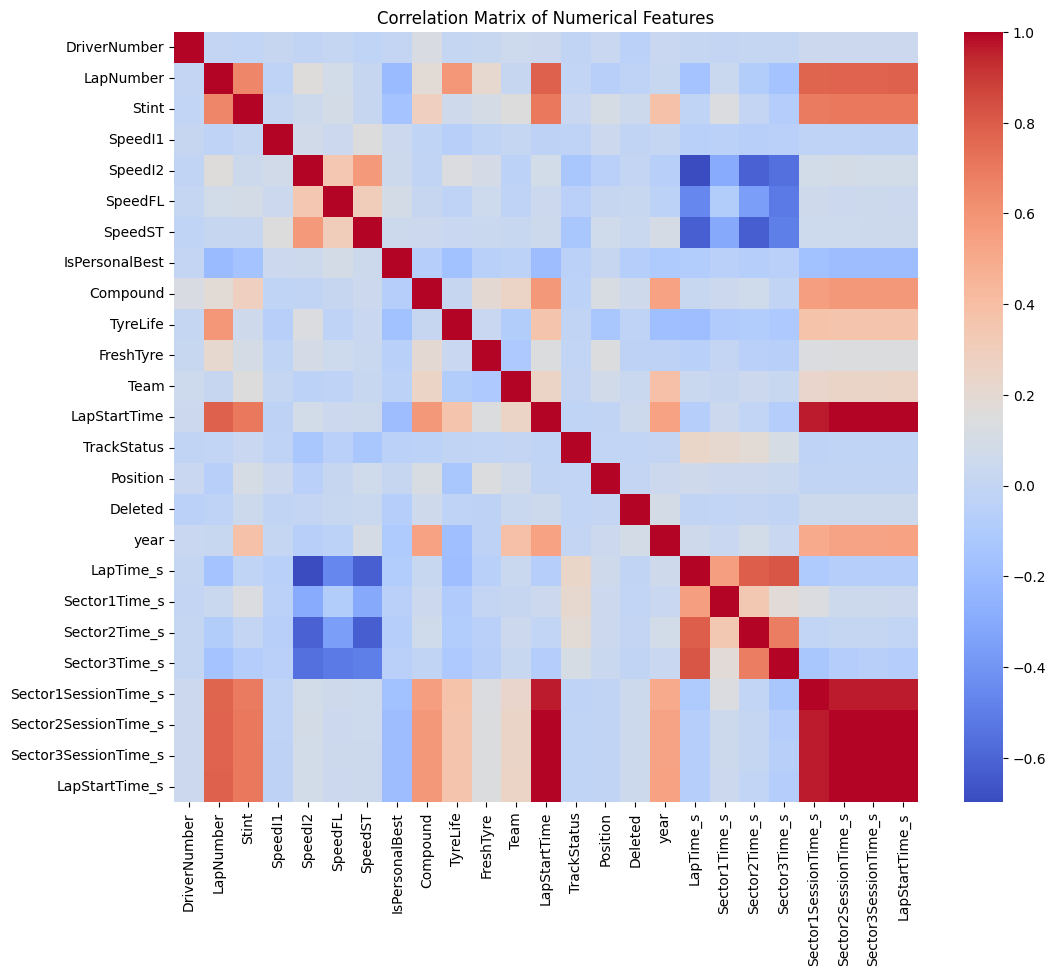

In [25]:
# prompt: Plot  correlation matrix using Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numerical_df = final_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Correlation with 'Position':
Position                1.000000
FreshTyre               0.141111
Compound                0.115104
Stint                   0.111115
Team                    0.072308
SpeedST                 0.069446
LapTime_s               0.064949
Sector1Time_s           0.044797
year                    0.043532
Sector2Time_s           0.040830
SpeedI1                 0.039372
Sector3Time_s           0.037922
DriverNumber            0.025838
IsPersonalBest          0.018388
SpeedFL                 0.013429
Deleted                -0.001043
TrackStatus            -0.007563
Sector2SessionTime_s   -0.012222
LapStartTime_s         -0.012275
LapStartTime           -0.012275
Sector1SessionTime_s   -0.012277
Sector3SessionTime_s   -0.012474
SpeedI2                -0.050728
LapNumber              -0.062396
TyreLife               -0.136550
Name: Position, dtype: float64


/tmp/ipython-input-26-308481460.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_position.values, y=correlation_with_position.index, palette='coolwarm')


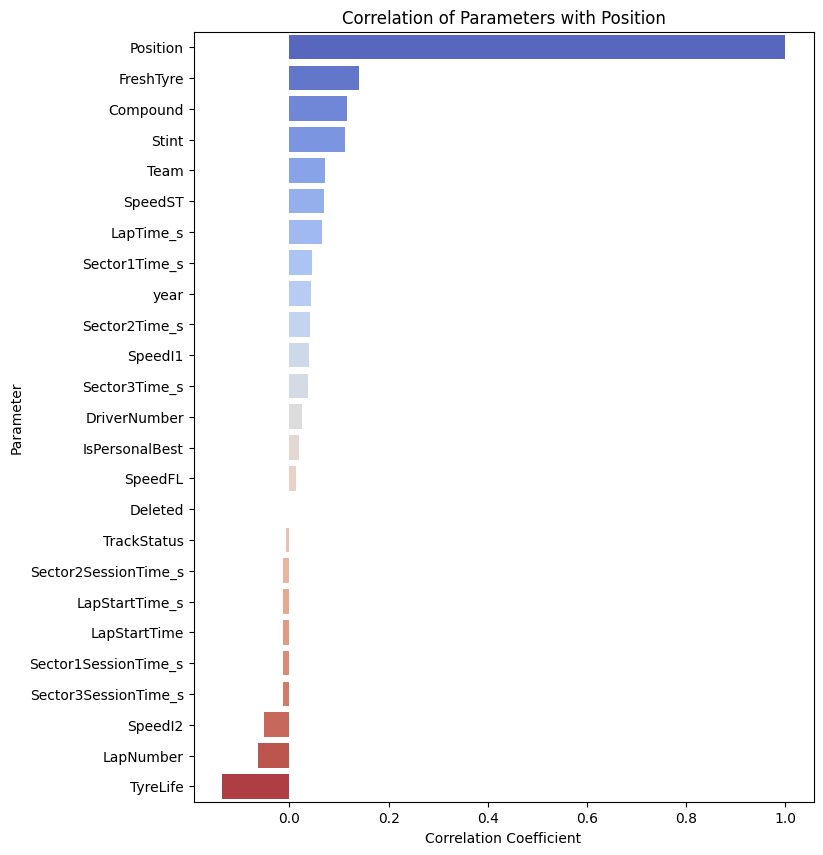

In [26]:
# prompt: Show the correlation of various parameters to 'Position'

import matplotlib.pyplot as plt
# Correlation with 'Position'
correlation_with_position = correlation_matrix['Position'].sort_values(ascending=False)

print("\nCorrelation with 'Position':")
print(correlation_with_position)

# Plot the correlation of other parameters with 'Position'
plt.figure(figsize=(8, 10))
sns.barplot(x=correlation_with_position.values, y=correlation_with_position.index, palette='coolwarm')
plt.title('Correlation of Parameters with Position')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Parameter')
plt.show()

In [27]:
# df['Winner'] = df['Position'] == 1
# df['Winner'] = df['Winner'].replace({True: 1, False: 0})

# Fixing data type issues in certain parameters

In [28]:
# Convert 'PitInTime' to timedelta objects
final_df['PitInTime'] = pd.to_timedelta(final_df['PitInTime'], errors='coerce')

# Extract total seconds and create a new column
final_df['PitInTime_s'] = final_df['PitInTime'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
final_df['PitInTime_s'] = final_df['PitInTime_s'].fillna(0)

# Drop the original 'PitInTime' column
final_df = final_df.drop('PitInTime', axis=1)

final_df.head()

,DriverNumber,LapNumber,Stint,PitOutTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,...,year,LapTime_s,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s,PitInTime_s
1,10,2.0,1.0,0,306.0,214.0,271.0,290.0,1.0,1,...,2018,73.059,17.521,33.053,22.485,501.241,534.294,556.779,483.720,0.0
2,10,3.0,1.0,0,314.0,224.0,278.0,308.0,1.0,1,...,2018,71.444,17.443,31.545,22.456,574.222,605.767,628.223,556.779,0.0
3,10,4.0,1.0,0,316.0,227.0,279.0,309.0,1.0,1,...,2018,71.165,17.161,31.737,22.267,645.384,677.121,699.388,628.223,0.0
4,10,5.0,1.0,0,310.0,228.0,256.0,303.0,0.0,1,...,2018,72.408,17.333,31.559,23.516,716.721,748.280,771.796,699.388,0.0
5,10,6.0,1.0,0,311.0,227.0,276.0,306.0,0.0,1,...,2018,72.341,18.014,32.137,22.190,789.810,821.947,844.137,771.796,0.0


In [29]:
# Convert 'PitInTime' to timedelta objects
final_df['PitOutTime'] = pd.to_timedelta(final_df['PitOutTime'], errors='coerce')

# Extract total seconds and create a new column
final_df['PitOutTime_s'] = final_df['PitOutTime'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
final_df['PitOutTime_s'] = final_df['PitOutTime_s'].fillna(0)

# Drop the original 'PitInTime' column
final_df = final_df.drop('PitOutTime', axis=1)

final_df.head()

,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,...,LapTime_s,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s,PitInTime_s,PitOutTime_s
1,10,2.0,1.0,306.0,214.0,271.0,290.0,1.0,1,1.0,...,73.059,17.521,33.053,22.485,501.241,534.294,556.779,483.720,0.0,0.0
2,10,3.0,1.0,314.0,224.0,278.0,308.0,1.0,1,2.0,...,71.444,17.443,31.545,22.456,574.222,605.767,628.223,556.779,0.0,0.0
3,10,4.0,1.0,316.0,227.0,279.0,309.0,1.0,1,3.0,...,71.165,17.161,31.737,22.267,645.384,677.121,699.388,628.223,0.0,0.0
4,10,5.0,1.0,310.0,228.0,256.0,303.0,0.0,1,4.0,...,72.408,17.333,31.559,23.516,716.721,748.280,771.796,699.388,0.0,0.0
5,10,6.0,1.0,311.0,227.0,276.0,306.0,0.0,1,5.0,...,72.341,18.014,32.137,22.190,789.810,821.947,844.137,771.796,0.0,0.0


In [30]:
# Convert 'PitInTime' to timedelta objects
final_df['LapStartTime'] = pd.to_timedelta(final_df['LapStartTime'], errors='coerce')

# Extract total seconds and create a new column
final_df['LapStartTime_s'] = final_df['LapStartTime'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
final_df['LapStartTime_s'] = final_df['LapStartTime_s'].fillna(0)

# Drop the original 'PitInTime' column
final_df = final_df.drop('LapStartTime', axis=1)

final_df.head()

,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,...,LapTime_s,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s,PitInTime_s,PitOutTime_s
1,10,2.0,1.0,306.0,214.0,271.0,290.0,1.0,1,1.0,...,73.059,17.521,33.053,22.485,501.241,534.294,556.779,483.720,0.0,0.0
2,10,3.0,1.0,314.0,224.0,278.0,308.0,1.0,1,2.0,...,71.444,17.443,31.545,22.456,574.222,605.767,628.223,556.779,0.0,0.0
3,10,4.0,1.0,316.0,227.0,279.0,309.0,1.0,1,3.0,...,71.165,17.161,31.737,22.267,645.384,677.121,699.388,628.223,0.0,0.0
4,10,5.0,1.0,310.0,228.0,256.0,303.0,0.0,1,4.0,...,72.408,17.333,31.559,23.516,716.721,748.280,771.796,699.388,0.0,0.0
5,10,6.0,1.0,311.0,227.0,276.0,306.0,0.0,1,5.0,...,72.341,18.014,32.137,22.190,789.810,821.947,844.137,771.796,0.0,0.0


In [31]:
# Convert 'PitInTime' to timedelta objects
final_df['LapStartDate'] = pd.to_timedelta(final_df['LapStartDate'], errors='coerce')

# Extract total seconds and create a new column
final_df['LapStartDate_s'] = final_df['LapStartDate'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
final_df['LapStartDate_s'] = final_df['LapStartDate_s'].fillna(0)

# Drop the original 'PitInTime' column
final_df = final_df.drop('LapStartDate', axis=1)

final_df.head()

,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,...,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s,PitInTime_s,PitOutTime_s,LapStartDate_s
1,10,2.0,1.0,306.0,214.0,271.0,290.0,1.0,1,1.0,...,17.521,33.053,22.485,501.241,534.294,556.779,483.720,0.0,0.0,0.0
2,10,3.0,1.0,314.0,224.0,278.0,308.0,1.0,1,2.0,...,17.443,31.545,22.456,574.222,605.767,628.223,556.779,0.0,0.0,0.0
3,10,4.0,1.0,316.0,227.0,279.0,309.0,1.0,1,3.0,...,17.161,31.737,22.267,645.384,677.121,699.388,628.223,0.0,0.0,0.0
4,10,5.0,1.0,310.0,228.0,256.0,303.0,0.0,1,4.0,...,17.333,31.559,23.516,716.721,748.280,771.796,699.388,0.0,0.0,0.0
5,10,6.0,1.0,311.0,227.0,276.0,306.0,0.0,1,5.0,...,18.014,32.137,22.190,789.810,821.947,844.137,771.796,0.0,0.0,0.0


# Creating a machine learning model

In [32]:
# prompt: Split the dataset into test and train data ( use 80:20 split). Use Position as the target variable and create the X_test, X_train, y_train, y_test

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = final_df.drop('Position', axis=1) # Drop the target variable
y = final_df['Position'] # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7262, 26)
X_test shape: (1816, 26)
y_train shape: (7262,)
y_test shape: (1816,)


In [33]:
# prompt: Create an XGBoost Regressor to find the 'Position'

import matplotlib.pyplot as plt
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', # Objective for regression
                             n_estimators=100,         # Number of boosting rounds
                             learning_rate=0.1,        # Step size shrinkage
                             max_depth=5,              # Maximum depth of trees
                             random_state=42)         # For reproducibility

# Train the model
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
# prompt: Create classification report with the target variable position

import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Since Position is a continuous variable, you might want to round the predictions if treating as classification
# Or, you can keep it as regression and evaluate using regression metrics

# If you want to treat it as classification, you might need to convert predictions to integer positions
y_pred_int = np.round(y_pred).astype(int)

# Make sure the predicted positions are within a reasonable range (e.g., 1 to the max actual position)
max_position = y_test.max()
y_pred_int[y_pred_int < 1] = 1
y_pred_int[y_pred_int > max_position] = max_position

# Create a classification report
# Note: This treats each unique position as a class. It might not be meaningful if you have many unique positions.
# For regression tasks, classification report is generally not the most appropriate metric.
# However, if the task is to predict the *exact* position, you can use it.
# It will provide precision, recall, f1-score for each unique position present in y_test.

# Ensure that the unique values in y_test and y_pred_int are the same for a valid classification report
# If not, you might get errors or meaningless results. You might need to handle classes not present in predictions or test set.
# A simpler approach for regression treated as classification prediction might be to just look at accuracy or confusion matrix.

print("\nClassification Report (treating predictions as discrete positions):")
# We need to handle potential missing labels in either y_test or y_pred_int
# Combine unique labels from both test and predicted sets
labels = sorted(list(set(y_test.unique()).union(set(y_pred_int))))

# Generate the classification report
# zero_division=0 handles cases where a class has no samples in y_test or no predictions in y_pred_int
print(classification_report(y_test, y_pred_int, labels=labels, zero_division=0))

# You can also calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)
print(f"\nAccuracy (predicting exact position): {accuracy:.4f}")

# And a confusion matrix
# Note: Confusion matrix can be very large if there are many unique positions.
# print("\nConfusion Matrix:")
# conf_matrix = confusion_matrix(y_test, y_pred_int, labels=labels)
# print(conf_matrix)




Classification Report (treating predictions as discrete positions):
              precision    recall  f1-score   support

         1.0       0.75      0.22      0.34        83
         2.0       0.47      0.30      0.37       100
         3.0       0.29      0.33      0.31        87
         4.0       0.27      0.34      0.30       104
         5.0       0.27      0.29      0.28        98
         6.0       0.20      0.17      0.18        94
         7.0       0.23      0.21      0.22        91
         8.0       0.22      0.19      0.21       105
         9.0       0.17      0.20      0.19        88
        10.0       0.14      0.15      0.15        98
        11.0       0.13      0.19      0.16        98
        12.0       0.24      0.36      0.29       109
        13.0       0.21      0.30      0.25        99
        14.0       0.13      0.22      0.16        83
        15.0       0.18      0.22      0.20       103
        16.0       0.18      0.13      0.15        98
        17.0

# Obtaining the Austrian Grand Prix 2025 data


In [35]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.7.5 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


In [36]:
import fastf1
import os
import pandas as pd

# Enable cache for faster future loads

cache_dir = os.path.expanduser("~/.fastf1_cache")
os.makedirs(cache_dir, exist_ok=True)

# Load the latest Austrian GP (update year if needed)
session = fastf1.get_session(2025, 'Austrian Grand Prix', 'R')
session.load()

# Get valid laps only
laps = session.laps
laps = laps[~laps['LapTime'].isna() & ~laps['Deleted']]

# Convert time columns to seconds
laps['LapTime'] = laps['LapTime'].dt.total_seconds()
laps['Sector1Time_s'] = laps['Sector1Time'].dt.total_seconds()
laps['Sector2Time_s'] = laps['Sector2Time'].dt.total_seconds()
laps['Sector3Time_s'] = laps['Sector3Time'].dt.total_seconds()
laps['Sector1SessionTime_s'] = laps['Sector1SessionTime'].dt.total_seconds()
laps['Sector2SessionTime_s'] = laps['Sector2SessionTime'].dt.total_seconds()
laps['Sector3SessionTime_s'] = laps['Sector3SessionTime'].dt.total_seconds()
laps['LapStartTime_s'] = laps['LapStartTime'].dt.total_seconds()
laps['PitInTime_s'] = laps['PitInTime'].dt.total_seconds()
laps['PitOutTime_s'] = laps['PitOutTime'].dt.total_seconds()
laps['LapStartDate_s'] = laps['LapStartDate'].astype('int64') / 1e9  # UNIX timestamp

# Add race year
laps['year'] = session.date.year

# Select only the columns you trained your model with
columns = [
    'DriverNumber', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL',
    'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
    'Team', 'TrackStatus', 'Position', 'Deleted', 'year', 'LapTime',
    'Sector1Time', 'Sector2Time', 'Sector3Time',
    'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
    'LapStartTime', 'PitInTime', 'PitOutTime', 'LapStartDate'
]

test_data = laps[columns].copy()

# Export for testing
test_data.to_csv("austrian_gp_2025_for_model.csv", index=False)


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Load

In [37]:
test_data = pd.read_csv("austrian_gp_2025_for_model.csv")

test_data.head()

,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,...,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,LapStartTime,PitInTime,PitOutTime,LapStartDate
0,4,1.0,1.0,297.0,233.0,234.0,293.0,False,MEDIUM,1.0,...,NaN,0 days 00:00:31.326000,0 days 00:00:36.909000,NaN,0 days 01:12:00.537000,0 days 01:12:37.527000,0 days 01:11:08.287000,NaN,NaN,2025-06-29 13:18:01.080
1,4,2.0,1.0,131.0,186.0,212.0,165.0,True,MEDIUM,2.0,...,0 days 00:00:26.438000,0 days 00:00:53.661000,0 days 00:00:34.327000,0 days 01:13:03.884000,0 days 01:13:57.545000,0 days 01:14:31.872000,0 days 01:12:37.412000,NaN,NaN,2025-06-29 13:19:30.205
2,4,3.0,1.0,137.0,159.0,271.0,172.0,True,MEDIUM,3.0,...,0 days 00:00:26.434000,0 days 00:00:50.148000,0 days 00:00:36.440000,0 days 01:14:58.306000,0 days 01:15:48.454000,0 days 01:16:24.894000,0 days 01:14:31.838000,NaN,NaN,2025-06-29 13:21:24.631
3,4,4.0,1.0,298.0,234.0,272.0,295.0,True,MEDIUM,4.0,...,0 days 00:00:17.564000,0 days 00:00:31.393000,0 days 00:00:21.297000,0 days 01:16:42.458000,0 days 01:17:13.851000,0 days 01:17:35.148000,0 days 01:16:24.860000,NaN,NaN,2025-06-29 13:23:17.653
4,4,5.0,1.0,289.0,232.0,275.0,281.0,True,MEDIUM,5.0,...,0 days 00:00:17.488000,0 days 00:00:31.430000,0 days 00:00:20.940000,0 days 01:17:52.636000,0 days 01:18:24.066000,0 days 01:18:45.006000,0 days 01:17:35.114000,NaN,NaN,2025-06-29 13:24:27.907


Need to format the Austrian 2025 data

In [38]:
df = test_data

In [39]:
df.columns

Index(['DriverNumber', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'Team', 'TrackStatus', 'Position', 'Deleted', 'year', 'LapTime',
       'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime',
       'Sector2SessionTime', 'Sector3SessionTime', 'LapStartTime', 'PitInTime',
       'PitOutTime', 'LapStartDate'],
      dtype='object')

In [40]:
cols_to_fill = ['Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3Time']
df[cols_to_fill] = df[cols_to_fill].fillna(0)


df['IsPersonalBest'] = df['IsPersonalBest'].replace({True: 1, False: 0})
df['IsPersonalBest']


cols_to_fill = ['SpeedI1','SpeedI2','SpeedFL','SpeedST']
df[cols_to_fill] = df[cols_to_fill].fillna(0)


df.dropna(subset=['LapTime'], inplace=True)
print("\nDataFrame after removing rows with NaN 'LapTime':")
df.head()
print("\nNaN counts after dropping 'LapTime' NaN rows:")
print(df.isna().sum())

df.dropna(subset=['TyreLife'], inplace=True)

df[['Sector2Time', 'Sector3SessionTime']] = df[['Sector2Time', 'Sector3SessionTime']].fillna(0)


df['Deleted'] = df['Deleted'].replace({True: 1, False: 0})
df['FreshTyre'] = df['FreshTyre'].replace({True: 1, False: 0})


df['Compound'] = df['Compound'].replace({
    'SUPERSOFT': 1,
    'SOFT': 2,
    'ULTRASOFT': 3,
    'MEDIUM': 4,
    'HARD': 5
})

print("Unique Compounds after replacement:", df['Compound'].unique())







DataFrame after removing rows with NaN 'LapTime':

NaN counts after dropping 'LapTime' NaN rows:
DriverNumber          0
LapNumber             0
Stint                 0
SpeedI1               0
SpeedI2               0
SpeedFL               0
SpeedST               0
IsPersonalBest        0
Compound              0
TyreLife              0
FreshTyre             0
Team                  0
TrackStatus           0
Position              0
Deleted               0
year                  0
LapTime               0
Sector1Time           0
Sector2Time           0
Sector3Time           0
Sector1SessionTime    0
Sector2SessionTime    0
Sector3SessionTime    0
LapStartTime          0
PitInTime             0
PitOutTime            0
LapStartDate          0
dtype: int64
Unique Compounds after replacement: [4 5 2]


/tmp/ipython-input-40-2657582173.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsPersonalBest'] = df['IsPersonalBest'].replace({True: 1, False: 0})
/tmp/ipython-input-40-2657582173.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Deleted'] = df['Deleted'].replace({True: 1, False: 0})
/tmp/ipython-input-40-2657582173.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [41]:
set(df['Team'])

{'Alpine',
 'Aston Martin',
 'Ferrari',
 'Haas F1 Team',
 'Kick Sauber',
 'McLaren',
 'Mercedes',
 'Racing Bulls',
 'Red Bull Racing',
 'Williams'}

In [42]:

team_mapping = {
    'Toro Rosso': 1,
    'Force India': 2,
    'McLaren': 3,
    'Sauber': 4,
    'Williams': 5,
    'Haas F1 Team': 6,
    'Renault': 7,
    'Red Bull Racing': 8,
    'Mercedes': 9,
    'Ferrari': 10,
    'Alfa Romeo Racing': 11,
    'Racing Point': 12,
    'AlphaTauri': 13,
    'Alpine': 14,
    'Aston Martin': 15,
    'Alfa Romeo': 16,
    'RB': 17,
    'Kick Sauber': 18,
    'Racing Bulls': 19
}

df['Team'] = df['Team'].replace(team_mapping)

print("Unique Teams after replacement:", df['Team'].unique())




time_columns = ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time','Sector1SessionTime','Sector2SessionTime','Sector3SessionTime','LapStartTime' ]

for col in time_columns:
    df[col] = pd.to_timedelta(df[col])
    df[col + '_s'] = df[col].dt.total_seconds()

final_df = df.drop(columns=['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime'])


Unique Teams after replacement: [ 3 10  9 19 15 18  6 14  8  5]


/tmp/ipython-input-42-3487583278.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Team'] = df['Team'].replace(team_mapping)


In [43]:
df.columns

Index(['DriverNumber', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'Team', 'TrackStatus', 'Position', 'Deleted', 'year', 'LapTime',
       'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime',
       'Sector2SessionTime', 'Sector3SessionTime', 'LapStartTime', 'PitInTime',
       'PitOutTime', 'LapStartDate', 'LapTime_s', 'Sector1Time_s',
       'Sector2Time_s', 'Sector3Time_s', 'Sector1SessionTime_s',
       'Sector2SessionTime_s', 'Sector3SessionTime_s', 'LapStartTime_s'],
      dtype='object')

In [44]:
# Convert 'PitInTime' to timedelta objects
df['PitInTime'] = pd.to_timedelta(df['PitInTime'], errors='coerce')

# Extract total seconds and create a new column
df['PitInTime_s'] = df['PitInTime'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
df['PitInTime_s'] = df['PitInTime_s'].fillna(0)

# Drop the original 'PitInTime' column
df = df.drop('PitInTime', axis=1)




# Convert 'PitInTime' to timedelta objects
df['PitOutTime'] = pd.to_timedelta(df['PitOutTime'], errors='coerce')

# Extract total seconds and create a new column
df['PitOutTime_s'] = df['PitOutTime'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
df['PitOutTime_s'] = df['PitOutTime_s'].fillna(0)

# Drop the original 'PitInTime' column
df = df.drop('PitOutTime', axis=1)





# Convert 'PitInTime' to timedelta objects
df['LapStartTime'] = pd.to_timedelta(df['LapStartTime'], errors='coerce')

# Extract total seconds and create a new column
df['LapStartTime_s'] = df['LapStartTime'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
df['LapStartTime_s'] = df['LapStartTime_s'].fillna(0)

# Drop the original 'PitInTime' column
df = df.drop('LapStartTime', axis=1)





# Convert 'PitInTime' to timedelta objects
df['LapStartDate'] = pd.to_timedelta(df['LapStartDate'], errors='coerce')

# Extract total seconds and create a new column
df['LapStartDate_s'] = df['LapStartDate'].dt.total_seconds()

# Fill any remaining NaN values in the new column with 0
df['LapStartDate_s'] = df['LapStartDate_s'].fillna(0)

# Drop the original 'PitInTime' column
df = df.drop('LapStartDate', axis=1)

df.head()

,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,...,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s,PitInTime_s,PitOutTime_s,LapStartDate_s
0,4,1.0,1.0,297.0,233.0,234.0,293.0,0,4,1.0,...,0.000,31.326,36.909,0.000,4320.537,4357.527,4268.287,0.0,0.0,0.0
1,4,2.0,1.0,131.0,186.0,212.0,165.0,1,4,2.0,...,26.438,53.661,34.327,4383.884,4437.545,4471.872,4357.412,0.0,0.0,0.0
2,4,3.0,1.0,137.0,159.0,271.0,172.0,1,4,3.0,...,26.434,50.148,36.440,4498.306,4548.454,4584.894,4471.838,0.0,0.0,0.0
3,4,4.0,1.0,298.0,234.0,272.0,295.0,1,4,4.0,...,17.564,31.393,21.297,4602.458,4633.851,4655.148,4584.860,0.0,0.0,0.0
4,4,5.0,1.0,289.0,232.0,275.0,281.0,1,4,5.0,...,17.488,31.430,20.940,4672.636,4704.066,4725.006,4655.114,0.0,0.0,0.0


In [46]:
df.columns

Index(['DriverNumber', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'Team', 'TrackStatus', 'Position', 'Deleted', 'year', 'LapTime',
       'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime',
       'Sector2SessionTime', 'Sector3SessionTime', 'LapTime_s',
       'Sector1Time_s', 'Sector2Time_s', 'Sector3Time_s',
       'Sector1SessionTime_s', 'Sector2SessionTime_s', 'Sector3SessionTime_s',
       'LapStartTime_s', 'PitInTime_s', 'PitOutTime_s', 'LapStartDate_s',
       'PredictedPosition'],
      dtype='object')

In [47]:
df['PredictedPosition']

,PredictedPosition
0,4.506560
1,6.590789
2,7.598342
3,2.382998
4,1.887404
...,...
1108,8.714369
1109,8.693784
1110,11.104615
1111,14.109896


In [48]:
import pandas as pd
import joblib

# Load test data


# If you used LabelEncoding for 'Team' or 'Compound', reapply them here
from sklearn.preprocessing import LabelEncoder

# # Load the encoders used during training
# team_le = joblib.load("team_encoder.pkl")
# compound_le = joblib.load("compound_encoder.pkl")

# # Encode using the same mapping
# test_data['Team'] = team_le.transform(test_data['Team'])
# test_data['Compound'] = compound_le.transform(test_data['Compound'])

# Load trained model
# model = joblib.load("xgb_model.pkl")

# Select features (exclude target column like Position if present)
features = [
    'DriverNumber', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL',
    'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
    'Team', 'TrackStatus', 'Deleted', 'year', 'LapTime_s',
    'Sector1Time_s', 'Sector2Time_s', 'Sector3Time_s',
    'Sector1SessionTime_s', 'Sector2SessionTime_s', 'Sector3SessionTime_s',
    'LapStartTime_s', 'PitInTime_s', 'PitOutTime_s', 'LapStartDate_s'
]

# Predict
X_test = df[features]
predictions = xgb_regressor.predict(X_test)


In [49]:

# Append predictions
df['PredictedPosition'] = predictions


In [51]:

# Optional: average predicted position per driver (since it's lap data)
result = df.groupby('DriverNumber').agg({
    'PredictedPosition': 'mean',
    'Team': 'first'
}).sort_values(by='PredictedPosition')

result['PredictedRank'] = range(1, len(result)+1)

# Show top 5 predicted results
print(result.head(5))

# Save output
result.to_csv("predicted_driver_results.csv")


              PredictedPosition  Team  PredictedRank
DriverNumber                                        
4                      2.715932     3              1
44                     3.562521    10              2
63                     4.008992     9              3
81                     4.480680     3              4
16                     7.180547    10              5


Model predicts:


1.   Lando Norris
2.   Lewis Hamilton
3.   George Russel



In reality, the winners are :


1.   Lando Norris
2.   Oscar Piastri
3.   Charles Leclerc

